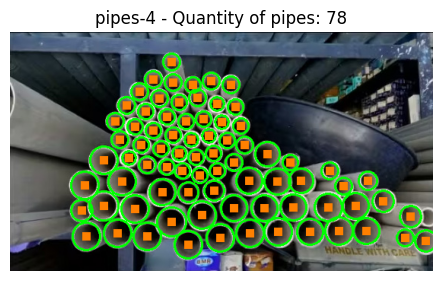

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def process_image_without_mask(image_path):
    image = cv.imread(image_path)
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    gray_blurred = cv.bilateralFilter(gray, 9, 75, 75)
    circles = cv.HoughCircles(
        gray_blurred,
        cv.HOUGH_GRADIENT_ALT,
        dp=1.5,
        minDist=5,
        param1=300,
        param2=0.9,
        minRadius=1,
        maxRadius=50
    )

    def remove_overlapping_circles(circles, min_dist):
        filtered_circles = []
        for i, (x1, y1, r1) in enumerate(circles):
            overlapping = False
            for j, (x2, y2, r2) in enumerate(filtered_circles):
                distance = np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
                if distance < min_dist:
                    overlapping = True
                    break
            if not overlapping:
                filtered_circles.append((x1, y1, r1))
        return filtered_circles

    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        circles = remove_overlapping_circles(circles, min_dist=1)
        for (x, y, r) in circles:
            cv.circle(image, (x, y), r, (0, 255, 0), 2)
            cv.rectangle(image, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

    return image, len(circles)

image_path = '../Task_2/pipes-4.jpg'
processed_image, count = process_image_without_mask(image_path)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(processed_image, cv.COLOR_BGR2RGB))
plt.title(f"pipes-4 - Quantity of pipes: {count}")
plt.axis('off')
plt.show()

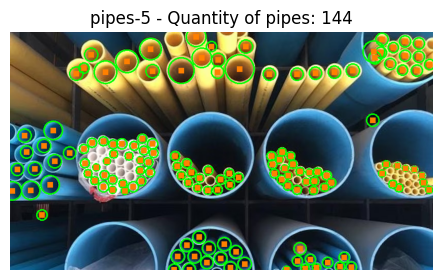

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def process_image_without_mask(image_path):
    image = cv.imread(image_path)
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    gray_blurred = cv.bilateralFilter(gray, 5, 50, 50)
    all_circles = []

    small_circles = cv.HoughCircles(
        gray_blurred,
        cv.HOUGH_GRADIENT_ALT,
        dp=1.5,
        minDist=3,
        param1=300,
        param2=0.6,
        minRadius=1,
        maxRadius=15
    )
    if small_circles is not None:
        all_circles.extend(np.round(small_circles[0, :]).astype("int"))

    medium_circles = cv.HoughCircles(
        gray_blurred,
        cv.HOUGH_GRADIENT_ALT,
        dp=1.5,
        minDist=5,
        param1=300,
        param2=0.8,
        minRadius=15,
        maxRadius=60
    )
    if medium_circles is not None:
        all_circles.extend(np.round(medium_circles[0, :]).astype("int"))

    def remove_overlapping_circles(circles, min_dist):
        filtered_circles = []
        for i, (x1, y1, r1) in enumerate(circles):
            overlapping = False
            for j, (x2, y2, r2) in enumerate(filtered_circles):
                distance = np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
                if distance < min_dist:
                    overlapping = True
                    break
            if not overlapping:
                filtered_circles.append((x1, y1, r1))
        return filtered_circles

    all_circles = remove_overlapping_circles(all_circles, min_dist=10)

    for (x, y, r) in all_circles:
        cv.circle(image, (x, y), r, (0, 255, 0), 2)
        cv.rectangle(image, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

    return image, len(all_circles)

image_path = '../Task_2/pipes-5.jpg'
processed_image, count = process_image_without_mask(image_path)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(processed_image, cv.COLOR_BGR2RGB))
plt.title(f"pipes-5 - Quantity of pipes: {count}")
plt.axis('off')
plt.show()

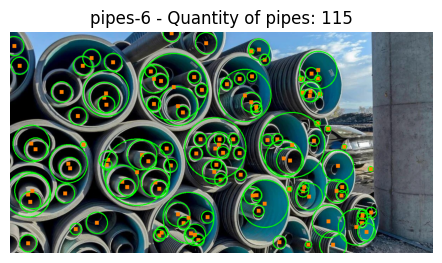

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def process_image_without_mask(image_path):
    image = cv.imread(image_path)
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    gray_blurred = cv.bilateralFilter(gray, 7, 75, 75)
    all_circles = []

    very_small_circles = cv.HoughCircles(
        gray_blurred,
        cv.HOUGH_GRADIENT_ALT,
        dp=1.5,
        minDist=3,
        param1=300,
        param2=0.5,
        minRadius=1,
        maxRadius=10
    )
    if very_small_circles is not None:
        all_circles.extend(np.round(very_small_circles[0, :]).astype("int"))

    small_circles = cv.HoughCircles(
        gray_blurred,
        cv.HOUGH_GRADIENT_ALT,
        dp=1.5,
        minDist=5,
        param1=300,
        param2=0.7,
        minRadius=10,
        maxRadius=20
    )
    if small_circles is not None:
        all_circles.extend(np.round(small_circles[0, :]).astype("int"))

    medium_circles = cv.HoughCircles(
        gray_blurred,
        cv.HOUGH_GRADIENT_ALT,
        dp=1.5,
        minDist=10,
        param1=300,
        param2=0.85,
        minRadius=20,
        maxRadius=60
    )
    if medium_circles is not None:
        all_circles.extend(np.round(medium_circles[0, :]).astype("int"))

    large_circles = cv.HoughCircles(
        gray_blurred,
        cv.HOUGH_GRADIENT_ALT,
        dp=1.5,
        minDist=20,
        param1=300,
        param2=0.9,
        minRadius=60,
        maxRadius=100
    )
    if large_circles is not None:
        all_circles.extend(np.round(large_circles[0, :]).astype("int"))

    def remove_overlapping_circles(circles, min_dist):
        filtered_circles = []
        for i, (x1, y1, r1) in enumerate(circles):
            overlapping = False
            for j, (x2, y2, r2) in enumerate(filtered_circles):
                distance = np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
                if distance < min_dist:
                    overlapping = True
                    break
            if not overlapping:
                filtered_circles.append((x1, y1, r1))
        return filtered_circles

    all_circles = remove_overlapping_circles(all_circles, min_dist=10)

    for (x, y, r) in all_circles:
        cv.circle(image, (x, y), r, (0, 255, 0), 2)
        cv.rectangle(image, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

    return image, len(all_circles)

image_path = '../Task_2/pipes-6.jpg'
processed_image, count = process_image_without_mask(image_path)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(processed_image, cv.COLOR_BGR2RGB))
plt.title(f"pipes-6 - Quantity of pipes: {count}")
plt.axis('off')
plt.show()